# 考察学习速率与收敛的关系

In [13]:
import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 0.00001

def gradentdecent2():#采用矩阵的方式梯度下降
    global Weight
    Weight=Weight-learningrate*np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    msehistory.append(np.sum(np.square(np.dot(Feature,Weight)-label)))
    

In [14]:
%%time
#看单元格执行时间
i = 0
for i in range(2000000):
    gradentdecent2()

Wall time: 28 s


## 绘制mse的变化过程

<IPython.core.display.Javascript object>


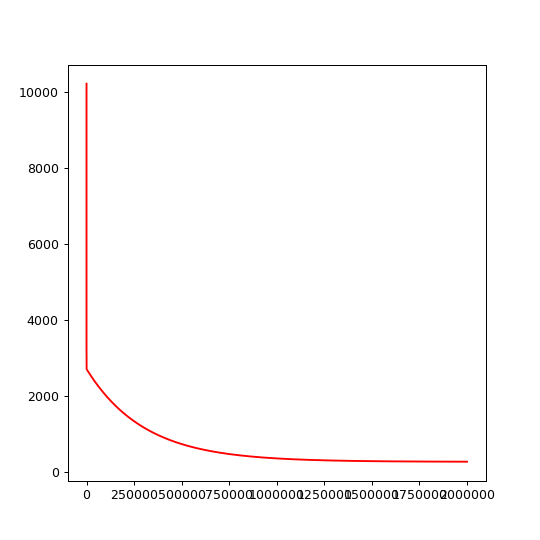

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.plot(msehistory,c='r')
plt.show()

## 绘制m,b的变化过程

<IPython.core.display.Javascript object>


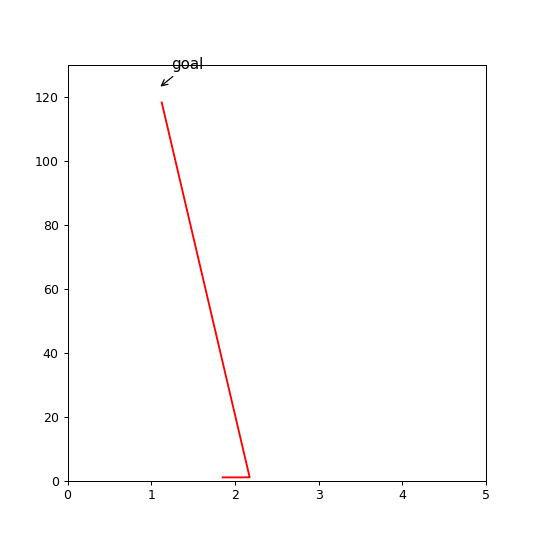

In [16]:
## m=1.0859,b=122.68
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
plt.plot(mhistory,bhistory,c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))
plt.show()

## 动画展示图表的API

In [17]:
# 导入动画包
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


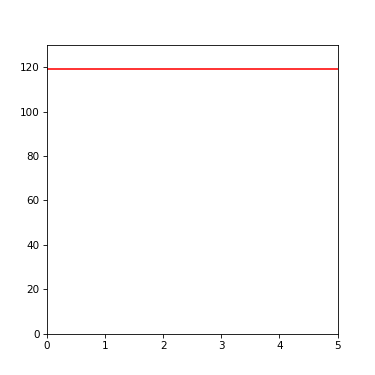

In [22]:
fig=plt.figure(figsize=(5,5),dpi=50)
plt.xlim(0,5)
plt.ylim(0,130)
#准备动画的假数据
x=np.linspace(0,5,6)
y=np.ones(6)*20
figurename,=plt.plot(x,y,c='r')#要获取图表的句柄，名字figurename

def update(num):
    figurename.set_data(x,np.ones(6)*num)

animation.FuncAnimation(fig,update,np.arange(0,120),interval=25,repeat=False)

<IPython.core.display.Javascript object>


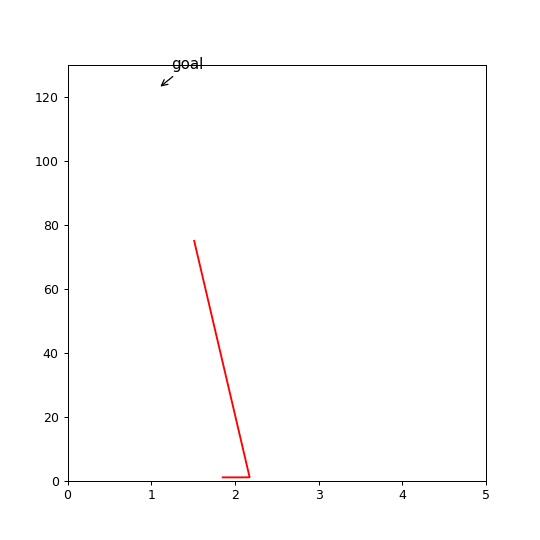

In [27]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory,bhistory,c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*1000],bhistory[0:num*1000])

animation.FuncAnimation(fig,update,np.arange(0,2001),interval=20,repeat=False)

## 调整学习速率的全套代码

<IPython.core.display.Javascript object>


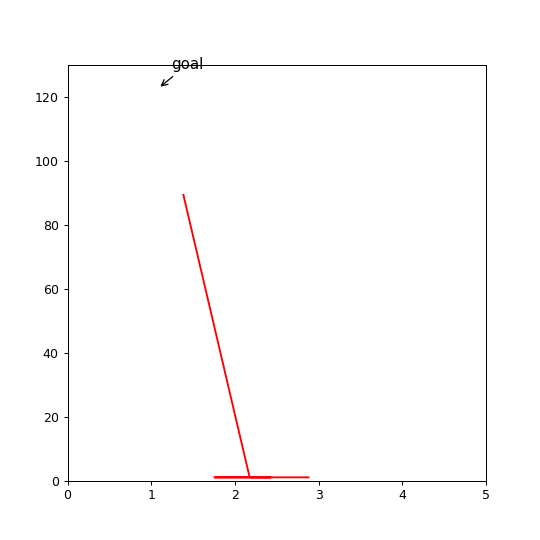

In [5]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 0.000022

def gradentdecent2():#采用矩阵的方式梯度下降
    global Weight
    Weight=Weight-learningrate*np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    msehistory.append(np.sum(np.square(np.dot(Feature,Weight)-label)))
    
i = 0
for i in range(500000):
    gradentdecent2()
    
    
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory,bhistory,c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*1000],bhistory[0:num*1000])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

<IPython.core.display.Javascript object>


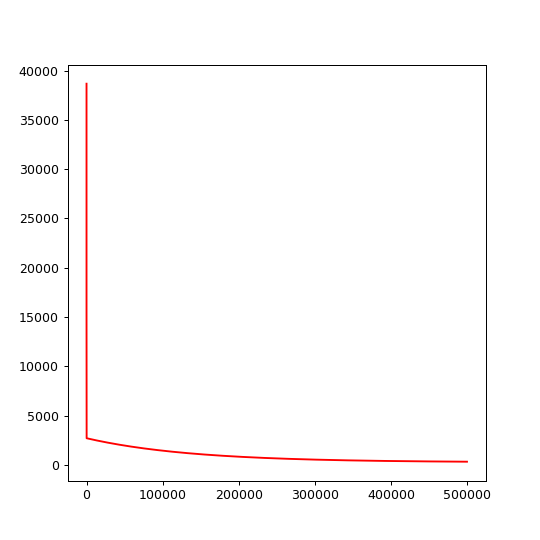

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.plot(msehistory,c='r')
plt.show()

## 学习率优化算法-HeiMa法¶
每一次梯度下降后，计算当前的mse，并且存储起来  
对比最近两次的mse，计算他们的差值  
如果mse变大，说明步子太大，学习速率需要降低，learningrate = learningrate / 2  
如果mse变小，说明步子没问题，看能不能走的再快一点，learningrate = learningrate × 1.05  
重复上述步骤  